In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\DELL\OneDrive\Documents\Work samples\movies.csv')

In [16]:
# Lets look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [18]:
# Now lets check if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [20]:
 # Data Types for our columns

print(df.dtypes) 

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [140]:
# Creating correct year column
df['yearcorrect'] = df['released'].astype(str).str[:4]
df.head()


name  rating  genre  year  released  score      votes  director  writer  \
0  4706       6      6  1980      1308    8.4   927000.0      1800    2841   
1  3943       6      1  1980      1131    5.8    65000.0      1581    1160   
2  3654       4      0  1980      1363    8.7  1200000.0       759    1822   
3   205       4      4  1980      1131    7.7   221000.0       891    1416   
4   734       6      4  1980      1174    7.3   108000.0       721     352   

   star  country      budget        gross  company  runtime yearcorrect  
0   700       46  19000000.0   46998772.0     1432    146.0        1308  
1   215       47   4500000.0   58853106.0      454    104.0        1131  
2  1161       47  18000000.0  538375067.0      949    124.0        1363  
3  1478       47   3500000.0   83453539.0     1114     88.0        1131  
4   272       47   6000000.0   39846344.0     1089     98.0        1174

In [142]:
df.sort_values(by=['gross'], inplace=False, ascending= False)

name  rating  genre  year  released  score      votes  director  writer  \
5445   387       5      0  2009       528    7.8  1100000.0       787    1265   
7445   389       5      0  2019       138    8.4   903000.0       106     515   
3045  4923       5      6  1997       535    7.8  1100000.0       787    1265   
6663  3656       5      0  2015       530    7.8   876000.0       770    1810   
7244   390       5      0  2018       146    8.4   897000.0       106     515   
7480  4402       4      2  2019      1130    6.9   222000.0      1014    1364   
6653  2125       5      0  2015      1307    7.0   593000.0       337    2530   
6043  3891       5      0  2012      1905    8.0  1300000.0      1062    1650   
6646  1545       5      0  2015       166    7.1   370000.0       811     483   
7494  1534       4      2  2019      2059    6.8   148000.0       279    1386   
6644   388       5      0  2015      1717    7.3   777000.0      1062    1650   
7247   568       5      0  2018       725    7.3   661000.0      1721    2694   
5845  1736       5      1  2011      1096    8.1   790000.0       454    2871   
7075  3657       5      0  2017       501    7.0   581000.0      1592    2494   
7271  2126       5      0  2018      1388    6.2   277000.0       766     779   
6262  1533       4      2  2013      2088    7.4   585000.0       279    1386   
7072   478       4      7  2017      1566    7.1   283000.0       156    2831   
7281  1973       4      2  2018      1329    7.6   263000.0       194     328   
7055  4133       5      0  2017        45    6.6   214000.0       569    1015   
6244  2021       5      0  2013      1886    7.1   779000.0      1772     839   
6688  2554       4      2  2015      1054    6.4   218000.0      1146     363   
6846   752       5      0  2016      1916    7.8   694000.0       106     515   
7250   344       5      0  2018       566    6.9   404000.0       811     701   
4245  4421       5      0  2003       517    8.9  1700000.0      1523    1240   
7458  3608       5      0  2019      1140    7.5   359000.0      1021     481   
7456   757       5      0  2019      1702    6.8   478000.0        97     182   
5878  4964       5      0  2011      1446    6.2   390000.0      1305     888   
6059  3511       5      0  2012      2154    7.7   642000.0      1737    2227   
6494  4963       5      0  2014      1428    5.6   302000.0      1305     888   
2448  4402       1      2  1994      1398    8.5   970000.0      1690    1208   
6047  4062       5      0  2012      1148    8.4  1600000.0       319    1610   
7463  3653       5      0  2019       554    6.5   394000.0       770     491   
7450  2099       6      5  2019      2327    8.4  1000000.0      1943    3008   
7488  4950       1      2  2019      1376    7.7   217000.0      1054    1528   
5685  4949       1      2  2010      1349    8.2   776000.0      1164    1528   
4852  2997       5      0  2006      1259    7.3   668000.0       676    2937   
6869  3273       5      0  2016       510    7.8   572000.0       617     494   
7481   207       4      1  2019      1842    6.9   239000.0       707    1471   
5860  3000       5      0  2011      1808    6.6   492000.0      1640    2937   
7140  1105       4      2  2017      1468    6.3   119000.0      1146     526   
2245  2123       5      0  1993      1296    8.1   894000.0      1864    2075   
6908  1415       4      2  2016      1343    7.3   250000.0        82     153   
3451  3650       4      0  1999      1783    6.5   748000.0       655    1048   
5667   216       4      1  2010      1684    6.4   392000.0      1924    1853   
6863  5344       4      2  2016      1678    8.0   450000.0       241     391   
6045  4254       5      1  2012       493    7.8   773000.0      1523     969   
3843  1741       4      1  2001      1993    7.6   685000.0       282    1238   
5243  4061       5      0  2008      1120    9.0  2400000.0       319    1610   
6311  1104       4      2  2013      

In [43]:
pd.set_option('display.max_rows', None)

In [49]:
# drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [69]:
# My hypothesis or guess- budget high correlation, company high correlation and lets test it out


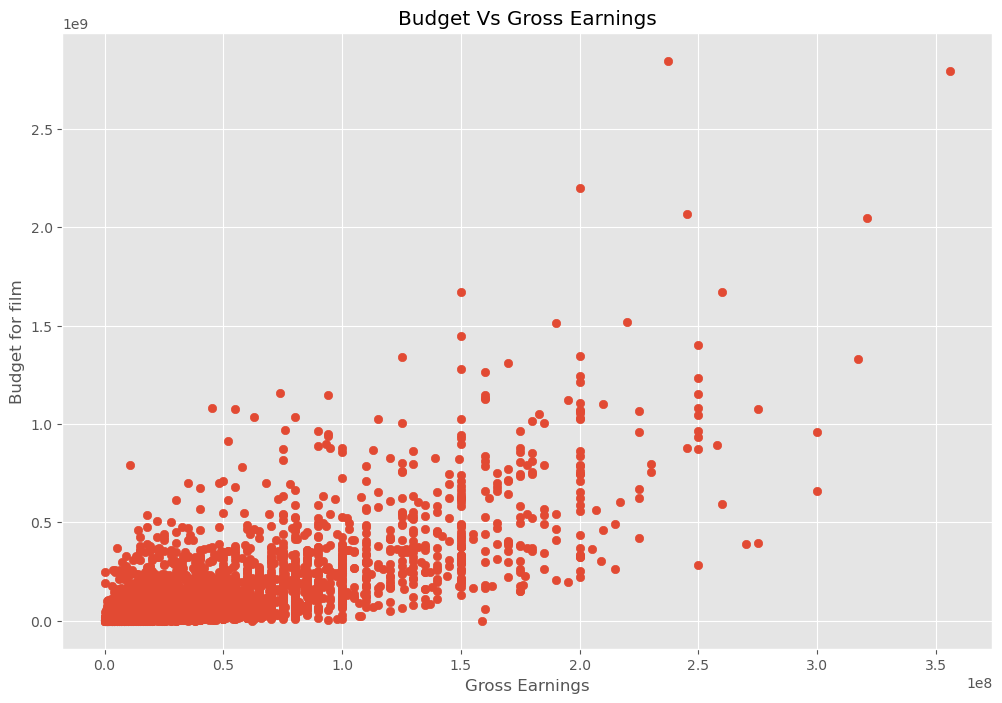

In [57]:
#Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget Vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for film')
plt.show()

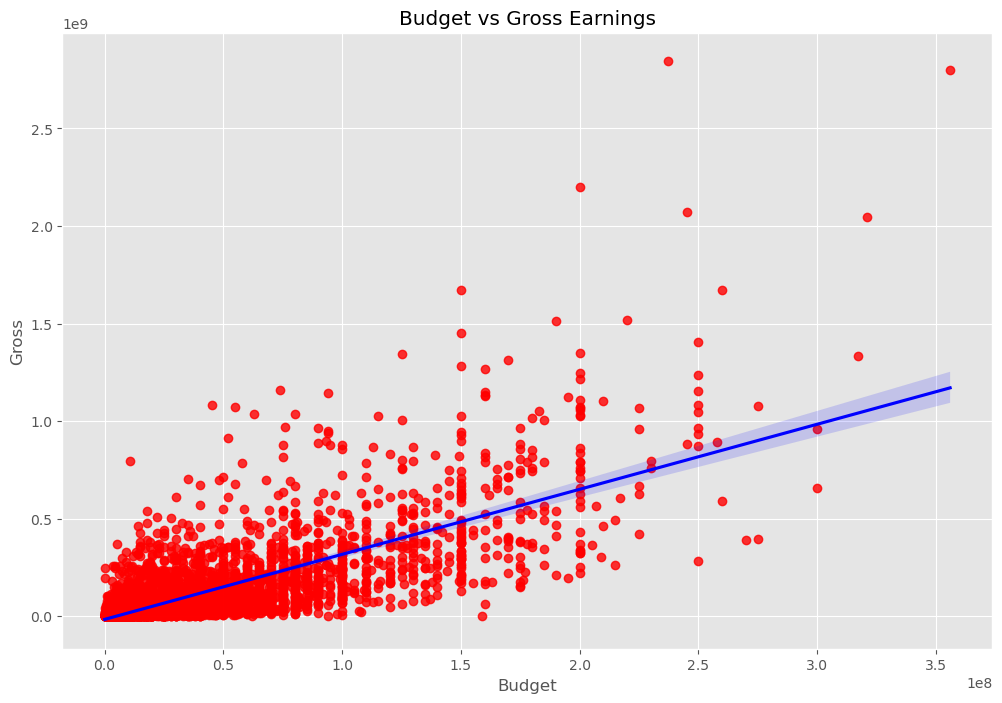

In [89]:
##Plot the budget Vs Gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

In [ ]:
#Lets now start looking at the correlation

In [98]:
df.corr(numeric_only = 'True') #pearson, kendall, spearman

year     score     votes    budget     gross   runtime
year     1.000000  0.055174  0.205758  0.327781  0.274264  0.074203
score    0.055174  1.000000  0.473809  0.071792  0.222143  0.414580
votes    0.205758  0.473809  1.000000  0.440021  0.614904  0.352437
budget   0.327781  0.071792  0.440021  1.000000  0.740395  0.318595
gross    0.274264  0.222143  0.614904  0.740395  1.000000  0.275596
runtime  0.074203  0.414580  0.352437  0.318595  0.275596  1.000000

In [100]:
#High correlation between budget and gross
#Hypothesis stands out correct

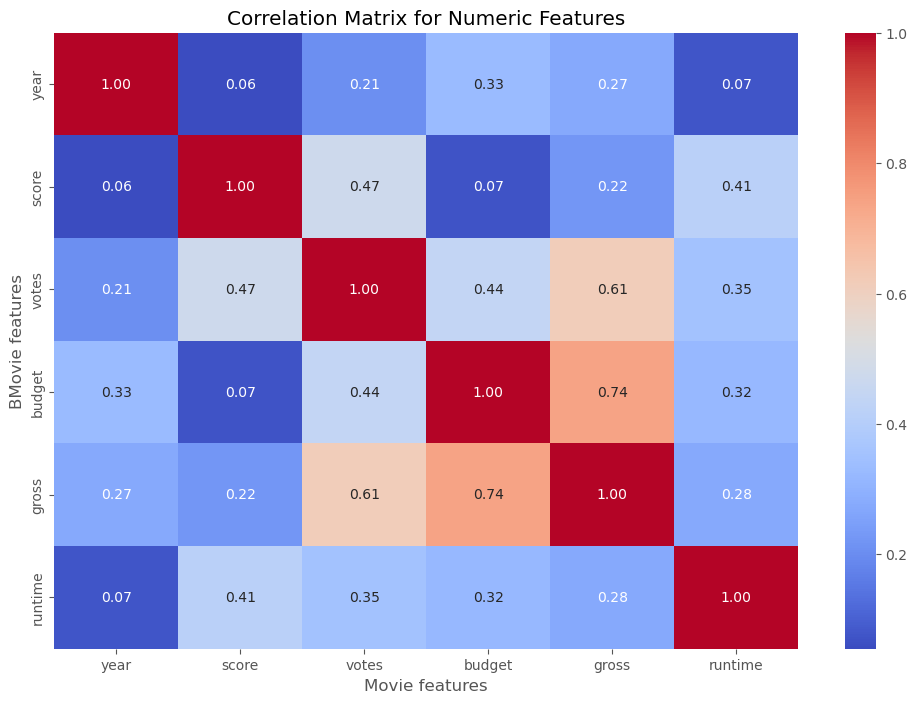

In [108]:


correlation_matrix = df.corr(numeric_only=True, method='pearson')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie features')
plt.ylabel('BMovie features')
plt.show()

In [110]:
#Lets look at company
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime yearcorrect  
0   46998772.0        Warner Bros.    146.0        June  
1   58853106.0   Columbia Pictures    104.0        July  
2  538375067.0           Lucasfilm    124.0        June  
3   83453539.0  Paramount Pictures     88.0        July  
4   39846344.0      Orion Pictures     98.0        July

In [122]:
#Lets change the name of the company from string to a numeric identifier -maybe like id

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
       df_numerized[col_name] = df_numerized[col_name].astype('category')
       df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
0     4706       6      6  1980      1308    8.4   927000.0      1800    2841   
1     3943       6      1  1980      1131    5.8    65000.0      1581    1160   
2     3654       4      0  1980      1363    8.7  1200000.0       759    1822   
3      205       4      4  1980      1131    7.7   221000.0       891    1416   
4      734       6      4  1980      1174    7.3   108000.0       721     352   
5     1513       6      9  1980      1928    6.4   123000.0      1763    3091   
6     3944       6      0  1980      1363    7.9   188000.0       976     578   
7     3134       6      3  1980       531    8.2   330000.0      1272    1259   
8     3745       4      0  1980      1350    6.8   101000.0      1611    1405   
9     4415       6      3  1980      1760    7.0    10000.0      2017     281   
10     333       4      0  1980       511    6.1    18000.0       238    2819   
11    4193       4      1  1980      2278    7.3    54000.0       819    1302   
12    3041       4      1  1980       472    5.3    30000.0      1648    1662   
13    2871       6      6  1980      2422    7.7    49000.0      1671    1657   
14    1211       6      5  1980      1174    7.1    37000.0       208     351   
15    3566       4      6  1980      2300    7.2    27000.0       849    2514   
17      67       4      4  1980       531    6.9    29000.0       335    2322   
18    4157       6      9  1980       835    6.8    66000.0       945    1489   
20     989       6      5  1980       716    6.5    20000.0      2038    3161   
21    1768       6      1  1980       118    6.8    14000.0      1310    2070   
22    4142       4      0  1980       214    6.7    22000.0       504    2969   
23    5303       4      8  1980       438    5.3    12000.0      1659    2499   
28     702       6      5  1980      1363    7.2    17000.0      1875    3109   
29     262       6      5  1980       669    6.2    22000.0      1492    2365   
33     787       4      6  1980       118    6.1      604.0      1148     675   
35    3080       6      4  1980      2162    6.2    24000.0       746    2213   
36    4259       6      4  1980      1888    6.3     4300.0       583     968   
37    2628       6      4  1980      2263    6.0    11000.0      1118    2585   
42    4750       6      0  1980      1417    7.1     9000.0      1618    1806   
46    4326       6      0  1980      1308    5.3     3900.0      1340    2390   
48    4526       4      0  1980      1928    5.1     3100.0       331    2041   
50    3661       4      4  1980      2482    7.3    22000.0      2049    3194   
51    2506       6      4  1980      2422    6.8     4500.0      1027     304   
53     693       4      0  1980      1293    6.1    11000.0       329     770   
56    5207       4      0  1980      1634    4.6     2600.0       795    1080   
57    2829       4      4  1980      1055    5.4     2400.0       916    2630   
58    4533       6      0  1980       262    5.1     5200.0       553    1823   
75    4365       1      1  1980      1403    5.8     1300.0       269     941   
77    5254       6      4  1980       262    5.9      415.0      1487    1342   
80    2983       6      6  1980      2557    4.0      546.0       971    1016   
92    1980       4      0  1981      1300    8.4   905000.0      1864    1810   
94     285       6      4  1981       315    7.5    97000.0       976    1527   
95    1304       6      0  1981      1044    7.2   131000.0       945    1489   
96    4114       2      9  1981        46    7.5   192000.0      1740    2715   
97    3043       6      4  1981      1573    6.2    40000.0       178     308   
98     604       6      5  1981      1166    7.4    47000.0       208     351   
99     863       4      0  1981      1300    6.9    42000.0       480     278   
100   1332       6      1  1981        11    7.4    59000.0       939    2973   
101   2397       6      0  1981      

In [124]:
# So all the numeric values hasve been left alone and the object value has been converted to numeric

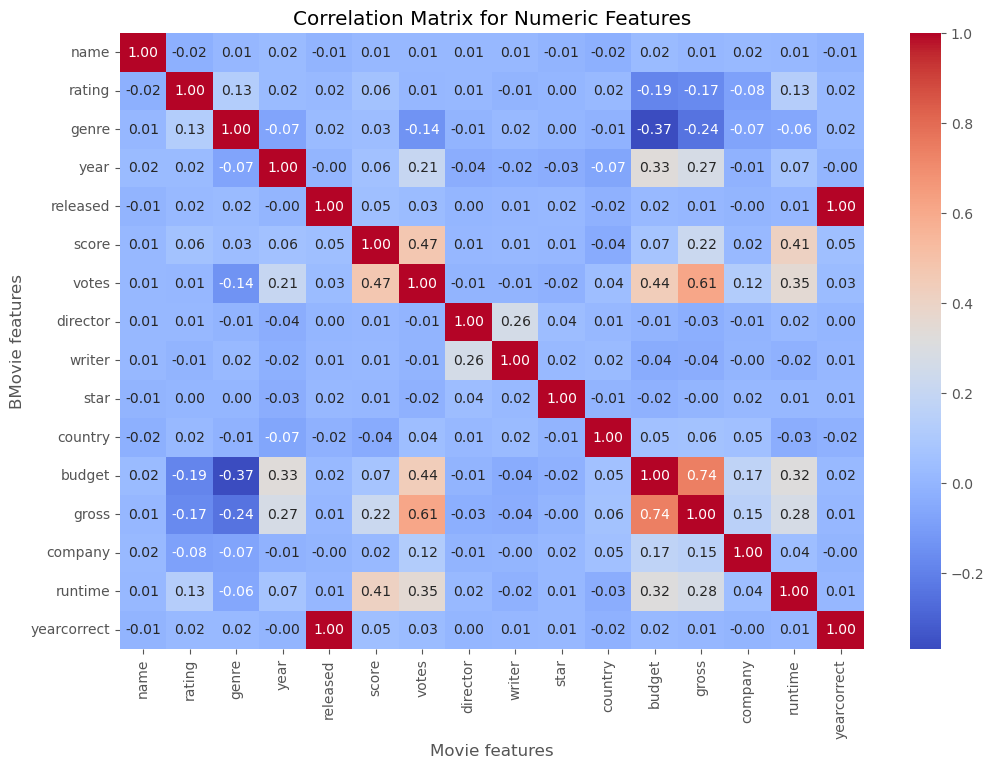

In [126]:
#Lets run correlation for df_numerized to see all 

correlation_matrix = df_numerized.corr(numeric_only=True, method='pearson')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie features')
plt.ylabel('BMovie features')
plt.show()

In [128]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.023013  0.009617  0.024435 -0.005896  0.014955   
rating      -0.023013  1.000000  0.128102  0.022668  0.018836  0.059550   
genre        0.009617  0.128102  1.000000 -0.073026  0.021712  0.034061   
year         0.024435  0.022668 -0.073026  1.000000 -0.001481  0.055174   
released    -0.005896  0.018836  0.021712 -0.001481  1.000000  0.046424   
score        0.014955  0.059550  0.034061  0.055174  0.046424  1.000000   
votes        0.012915  0.009255 -0.136457  0.205758  0.029029  0.473809   
director     0.013699  0.014847 -0.009303 -0.036936  0.003341  0.005573   
writer       0.011602 -0.006923  0.017500 -0.024568  0.008514  0.012860   
star        -0.007109  0.003737  0.002619 -0.032770  0.015363  0.009121   
country     -0.024555  0.020148 -0.010847 -0.066662 -0.017231 -0.044690   
budget       0.023698 -0.186892 -0.368900  0.327781  0.019888  0.071792   
gross        0.005966 -0.168814 -0.244380  0.274264  0.008614  0.222143   
company      0.021209 -0.082189 -0.073293 -0.013062 -0.002927  0.021054   
runtime      0.010800  0.133239 -0.060186  0.074203  0.008619  0.414580   
yearcorrect -0.007216  0.016205  0.021016 -0.004720  0.996190  0.045603   

                votes  director    writer      star   country    budget  \
name         0.012915  0.013699  0.011602 -0.007109 -0.024555  0.023698   
rating       0.009255  0.014847 -0.006923  0.003737  0.020148 -0.186892   
genre       -0.136457 -0.009303  0.017500  0.002619 -0.010847 -0.368900   
year         0.205758 -0.036936 -0.024568 -0.032770 -0.066662  0.327781   
released     0.029029  0.003341  0.008514  0.015363 -0.017231  0.019888   
score        0.473809  0.005573  0.012860  0.009121 -0.044690  0.071792   
votes        1.000000 -0.010198 -0.005394 -0.017140  0.042146  0.440021   
director    -0.010198  1.000000  0.262940  0.036289  0.011108 -0.009340   
writer      -0.005394  0.262940  1.000000  0.019273  0.022153 -0.039420   
star        -0.017140  0.036289  0.019273  1.000000 -0.010135 -0.021282   
country      0.042146  0.011108  0.022153 -0.010135  1.000000  0.054372   
budget       0.440021 -0.009340 -0.039420 -0.021282  0.054372  1.000000   
gross        0.614904 -0.029366 -0.035999 -0.000009  0.060929  0.740395   
company      0.119366 -0.007337 -0.002658  0.015086  0.049559  0.171385   
runtime      0.352437  0.018082 -0.016672  0.012439 -0.033554  0.318595   
yearcorrect  0.027719  0.004565  0.008114  0.014537 -0.016941  0.018254   

                gross   company   runtime  yearcorrect  
name         0.005966  0.021209  0.010800    -0.007216  
rating      -0.168814 -0.082189  0.133239     0.016205  
genre       -0.244380 -0.073293 -0.060186     0.021016  
year         0.274264 -0.013062  0.074203    -0.004720  
released     0.008614 -0.002927  0.008619     0.996190  
score        0.222143  0.021054  0.414580     0.045603  
votes        0.614904  0.119366  0.352437     0.027719  
director    -0.029366 -0.007337  0.018082     0.004565  
writer      -0.035999 -0.002658 -0.016672     0.008114  
star        -0.000009  0.015086  0.012439     0.014537  
country      0.060929  0.049559 -0.033554    -0.016941  
budget       0.740395  0.171385  0.318595     0.018254  
gross        1.000000  0.150233  0.275596     0.006973  
company      0.150233  1.000000  0.038752    -0.002808  
runtime      0.275596  0.038752  1.000000     0.006846  
yearcorrect  0.006973 -0.002808  0.006846     1.000000

In [132]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.023013
             genre          0.009617
             year           0.024435
             released      -0.005896
             score          0.014955
             votes          0.012915
             director       0.013699
             writer         0.011602
             star          -0.007109
             country       -0.024555
             budget         0.023698
             gross          0.005966
             company        0.021209
             runtime        0.010800
             yearcorrect   -0.007216
rating       name          -0.023013
             rating         1.000000
             genre          0.128102
             year           0.022668
             released       0.018836
             score          0.059550
             votes          0.009255
             director       0.014847
             writer        -0.006923
             star           0.003737
             country        0.020148
 

In [136]:
#Its the same correlation matrix we see above but in a linear way and easier to read 

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.368900
genre        budget        -0.368900
gross        genre         -0.244380
genre        gross         -0.244380
rating       budget        -0.186892
budget       rating        -0.186892
rating       gross         -0.168814
gross        rating        -0.168814
votes        genre         -0.136457
genre        votes         -0.136457
rating       company       -0.082189
company      rating        -0.082189
genre        company       -0.073293
company      genre         -0.073293
year         genre         -0.073026
genre        year          -0.073026
country      year          -0.066662
year         country       -0.066662
genre        runtime       -0.060186
runtime      genre         -0.060186
score        country       -0.044690
country      score         -0.044690
writer       budget        -0.039420
budget       writer        -0.039420
year         director      -0.036936
director     year          -0.036936
writer       gross         -0.035999
g

In [138]:

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        gross          0.614904
gross        votes          0.614904
             budget         0.740395
budget       gross          0.740395
released     yearcorrect    0.996190
yearcorrect  released       0.996190
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#Votes and budget have the highest correkation to the gross earnings

#Company has no correlation